## Import Library

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.metrics import silhouette_score

In [ ]:
# load dataset and show the first five sample
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/property_data_clustering_clean.csv"
df = pd.read_csv(url)
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW)
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil


In [ ]:
# describe data
df.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner)
count,308.000000,308.000000,308.000000,308.000000,308.000000,3.080000e+02
mean,226.951299,266.688312,4.275974,3.337662,1.840909,5.014301e+09
std,201.821447,213.161697,1.643804,1.627215,0.507932,8.311434e+09
min,14.000000,14.000000,1.000000,1.000000,1.000000,1.600000e+08
25%,96.000000,120.000000,3.000000,2.000000,2.000000,1.400000e+09
50%,162.500000,200.000000,4.000000,3.000000,2.000000,2.699500e+09
75%,283.000000,328.750000,5.000000,4.000000,2.000000,4.891667e+09
max,1561.000000,1200.000000,13.000000,13.000000,4.000000,9.900000e+10


In [ ]:
# Check for info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Area Category                  308 non-null    object
 1   Nama Daerah                    308 non-null    object
 2   Luas Tanah (m2)                308 non-null    int64 
 3   Luas Bangunan (m2)             308 non-null    int64 
 4   Jumlah Kamar                   308 non-null    int64 
 5   Jumlah Kamar Mandi             308 non-null    int64 
 6   Tingkat/Lantai                 308 non-null    int64 
 7   Harga Penawaran (dari Owner)   308 non-null    int64 
 8   Terjual/Belum                  308 non-null    object
 9   Arah Hadap Rumah               308 non-null    object
 10  Posisi Rumah                   308 non-null    object
 11  Lebar Jalan Depan Rumah (ROW)  308 non-null    object
dtypes: int64(6), object(6)
memory usage: 29.0+ KB


In [ ]:
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Check for inconsistencies in categorical columns
categorical_cols = df.select_dtypes(include='object').columns

print("\nUnique values and counts for categorical columns:")
for col in categorical_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())

Missing values per column:
Area Category                    0
Nama Daerah                      0
Luas Tanah (m2)                  0
Luas Bangunan (m2)               0
Jumlah Kamar                     0
Jumlah Kamar Mandi               0
Tingkat/Lantai                   0
Harga Penawaran (dari Owner)     0
Terjual/Belum                    0
Arah Hadap Rumah                 0
Posisi Rumah                     0
Lebar Jalan Depan Rumah (ROW)    0
dtype: int64

Unique values and counts for categorical columns:

--- Area Category ---
Area Category
Standard          140
Premium           106
Below Standard     36
Sangat Premium     26
Name: count, dtype: int64

--- Nama Daerah ---
Nama Daerah
Citraland           34
Gubeng              19
Mulyorejo           18
Pakuwon City        16
Wiyung              11
                    ..
Pakal                1
Asemrowo             1
Tenggilis Mejoyo     1
Dukuh Pakis          1
Teuku Umar           1
Name: count, Length: 126, dtype: int64

--- Terjual/

- **Area Category:** Has four distinct categories: Standard, Premium, Below Standard, and Sangat Premium. These seem consistent.
- **Nama Daerah:** There are a large number of unique values (126), indicating a wide geographical distribution of properties. This column might need further consideration for feature engineering or exclusion depending on the clustering goal.
- **Terjual/Belum:** All values are 'Belum', indicating no properties in this dataset have been sold. This column will not be useful for clustering as it has no variation.
- **Arah Hadap Rumah:** Has four distinct categories: Utara, Selatan, Timur, and Barat. These seem consistent.
- **Posisi Rumah:** Has five distinct categories: Standard, Tikungan/Hook, Cul De Sac/Ujung Gang Buntu, Tusuk Sate, and Kantong Belakang/Ngantong. These seem consistent.
- **Lebar Jalan Depan Rumah (ROW):** Has three distinct categories: 1-2 Mobil, > 2 Mobil, and < 1 Mobil. These seem consistent.

Secara keseluruhan, dataset yang digunakan sudah bersih dan siap untuk tahap analisis berikutnya. Tidak ditemukan nilai yang hilang maupun inkonsistensi pada data. Sebagian besar kolom kategorikal memiliki nilai yang konsisten, seperti Area Category, Arah Hadap Rumah, Posisi Rumah, dan Lebar Jalan Depan Rumah (ROW). Namun, kolom Nama Daerah memiliki jumlah nilai unik yang sangat banyak (126), sehingga memerlukan penanganan khusus karena high cardinality dapat memengaruhi proses clustering. Sementara itu, kolom Terjual/Belum hanya berisi satu nilai unik (Belum), sehingga tidak memberikan informasi yang berguna dan sebaiknya dikeluarkan dari analisis.

# 1. Bar plot of average Harga Penawaran (dari Owner) per Area Category

/tmp/ipython-input-494230014.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Area Category', y='Harga Penawaran (dari Owner)', data=df, palette='viridis')


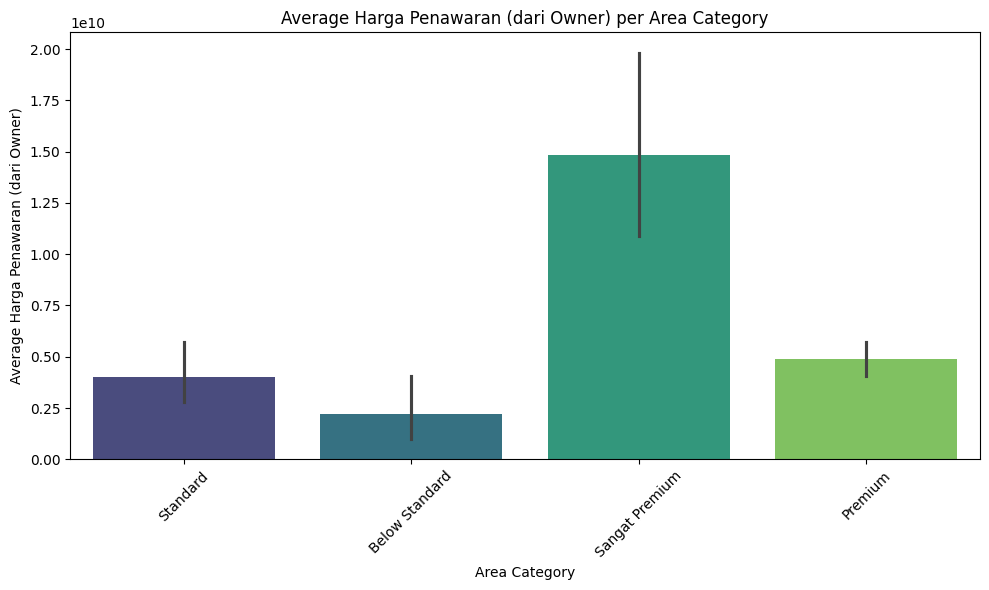

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Area Category', y='Harga Penawaran (dari Owner)', data=df, palette='viridis')
plt.title('Average Harga Penawaran (dari Owner) per Area Category')
plt.xlabel('Area Category')
plt.ylabel('Average Harga Penawaran (dari Owner)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Visualisasi ini menunjukkan perbandingan rata-rata harga penawaran properti berdasarkan kategori area. Terlihat bahwa kategori Sangat Premium memiliki harga rata-rata tertinggi secara signifikan, mendekati Rp15 miliar, yang menandakan bahwa area ini termasuk segmen pasar eksklusif dengan properti berukuran besar dan lokasi yang strategis. Kategori Premium berada di posisi kedua dengan harga rata-rata sekitar Rp5 miliar, menunjukkan bahwa area ini masih bernilai tinggi namun tidak se-eksklusif kategori “Sangat Premium”. Sementara itu, kategori Standard dan Below Standard memiliki harga rata-rata jauh lebih rendah, masing-masing sekitar Rp3–4 miliar dan Rp2 miliar, yang mengindikasikan bahwa area-area ini lebih terjangkau dan cenderung menyasar pasar menengah ke bawah. Selain itu, error bar pada grafik memperlihatkan variasi harga yang cukup tinggi pada kategori Sangat Premium, menunjukkan adanya perbedaan besar antar properti di area tersebut, yang kemungkinan disebabkan oleh variasi ukuran, lokasi, atau fasilitas yang dimiliki.

# 2. Pie chart of Posisi Rumah category proportions

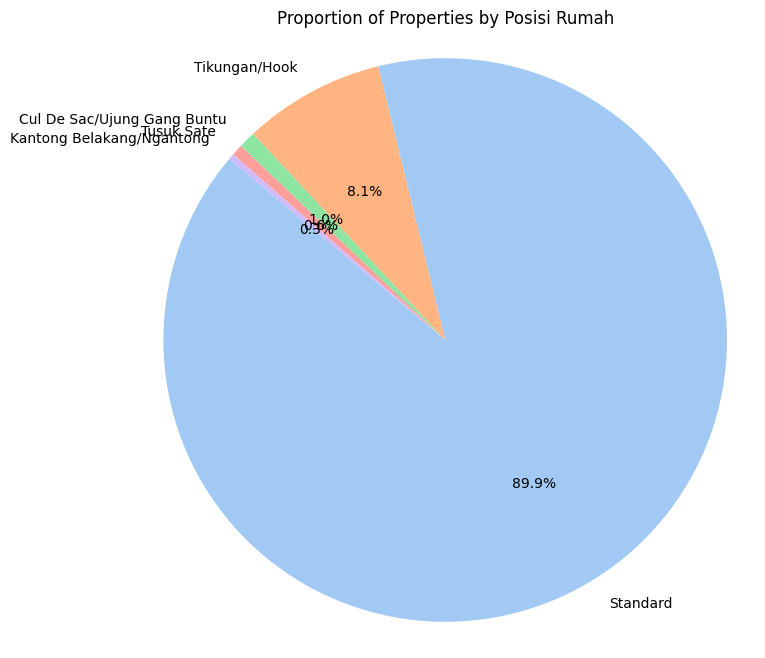

In [ ]:
posisi_counts = df['Posisi Rumah'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(posisi_counts, labels=posisi_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Proportion of Properties by Posisi Rumah')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Visualisasi ini menunjukkan proporsi posisi rumah berdasarkan kategori yang ada dalam dataset. Sebagian besar properti, yaitu sekitar 89,9%, berada pada posisi Standard, yang menandakan bahwa mayoritas rumah memiliki posisi umum di tengah deretan perumahan tanpa keistimewaan khusus seperti tikungan atau tusuk sate. Posisi ini biasanya lebih diminati karena dianggap aman, memiliki akses yang mudah, dan tidak terpengaruh oleh faktor lingkungan ekstrem. Kategori Tikungan/Hook menempati posisi kedua dengan proporsi sekitar 8,1%, menunjukkan bahwa sebagian kecil rumah berada di sudut jalan, yang sering dianggap lebih menarik karena memiliki dua sisi terbuka dan potensi desain yang lebih fleksibel, meskipun harganya cenderung lebih tinggi. Sementara itu, posisi seperti Cul De Sac/Ujung Gang Buntu, Tusuk Sate, dan Kantong Belakang/Ngantong hanya mencakup kurang dari 2% dari total properti, menunjukkan bahwa rumah dengan posisi tersebut relatif jarang ditemukan. Secara keseluruhan, visualisasi ini menggambarkan bahwa pasar properti lebih didominasi oleh rumah dengan posisi standar, mencerminkan preferensi umum terhadap lokasi yang praktis dan aman dalam kawasan perumahan.

# 3. Correlation heatmap for numerical features

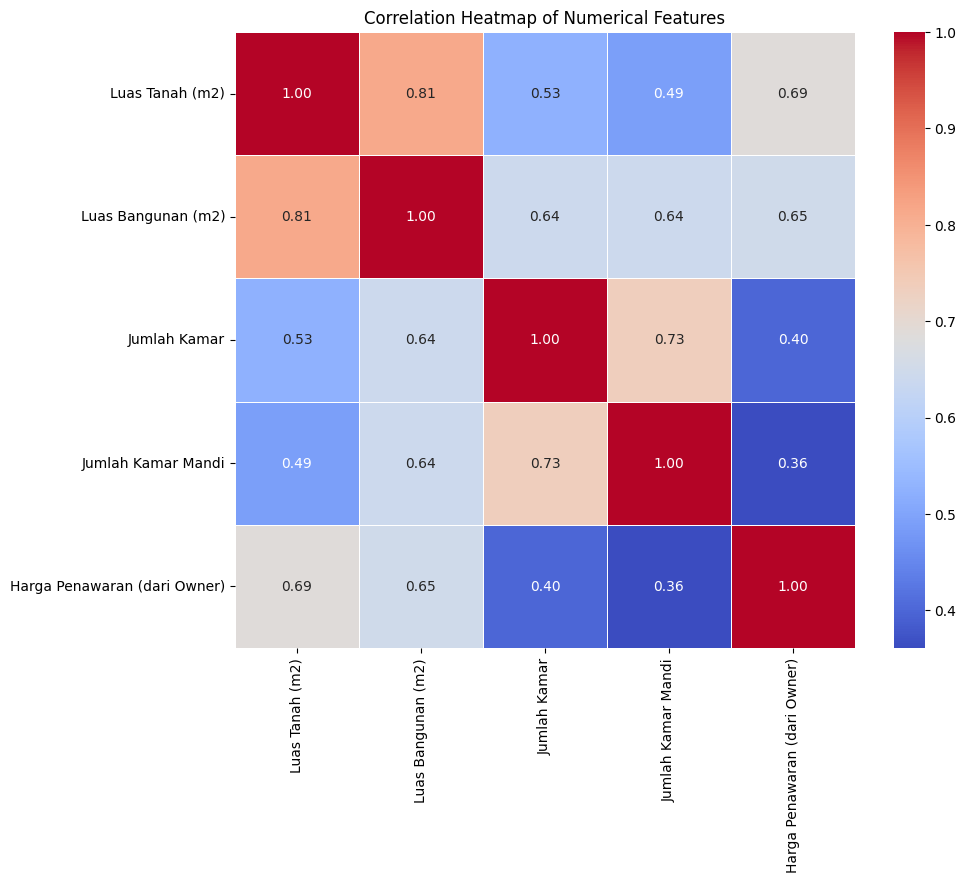

In [ ]:
numerical_cols = ['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Harga Penawaran (dari Owner)']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

Visualisasi heatmap korelasi ini menunjukkan hubungan antar variabel numerik dalam dataset properti. Terlihat bahwa Luas Tanah (m²) dan Luas Bangunan (m²) memiliki korelasi yang sangat kuat (0,81), menandakan bahwa semakin besar luas tanah, umumnya semakin besar pula luas bangunan yang dibangun di atasnya. Selain itu, Jumlah Kamar dan Jumlah Kamar Mandi juga memiliki korelasi tinggi (0,73), yang logis karena rumah dengan lebih banyak kamar biasanya juga memiliki lebih banyak kamar mandi.

Hubungan antara Harga Penawaran (dari Owner) dengan Luas Tanah (0,69) dan Luas Bangunan (0,65) juga menunjukkan korelasi positif yang cukup kuat. Hal ini berarti bahwa semakin besar ukuran tanah atau bangunan, semakin tinggi pula harga properti tersebut — sesuai dengan logika pasar properti di mana ukuran fisik menjadi faktor utama dalam menentukan nilai. Sebaliknya, korelasi harga dengan Jumlah Kamar (0,40) dan Jumlah Kamar Mandi (0,36) relatif lebih lemah, menunjukkan bahwa meskipun jumlah ruangan berpengaruh, faktor ukuran tanah dan bangunan memiliki dampak yang jauh lebih besar terhadap penentuan harga properti.

Secara keseluruhan, visualisasi ini mengindikasikan bahwa ukuran lahan dan bangunan merupakan penentu utama nilai properti, sementara jumlah kamar dan kamar mandi lebih berperan sebagai faktor pendukung dalam menentukan variasi harga.

# 4. Scatter plot of Luas Bangunan (m2) vs. Harga Penawaran (dari Owner), colored by Area Category

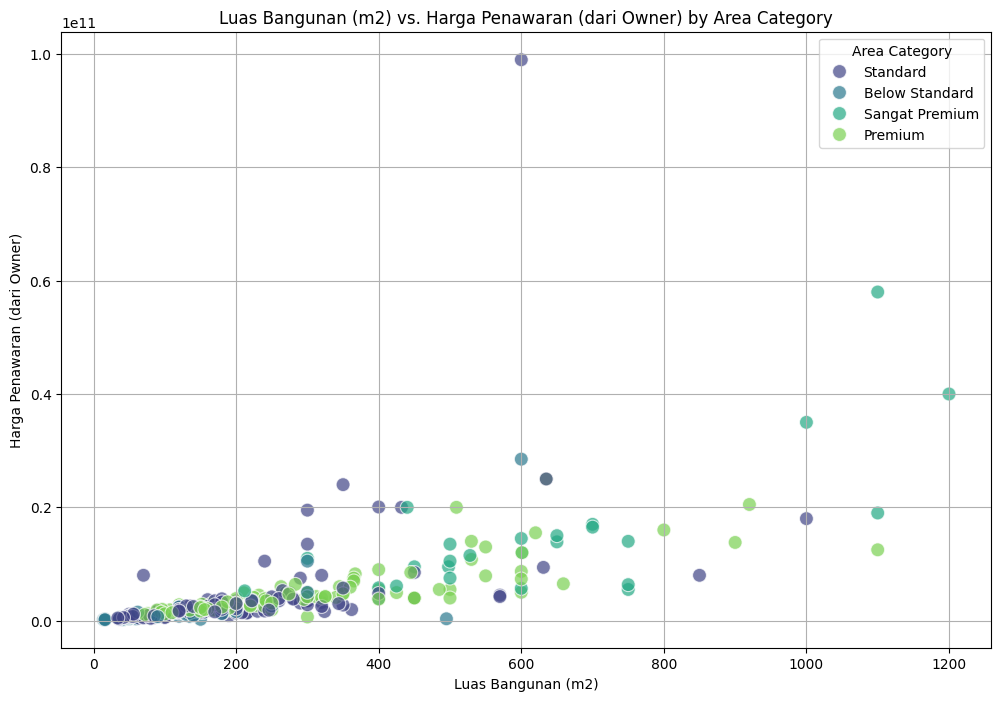

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='Luas Bangunan (m2)', y='Harga Penawaran (dari Owner)', hue='Area Category', palette='viridis', s=100, alpha=0.7)
plt.title('Luas Bangunan (m2) vs. Harga Penawaran (dari Owner) by Area Category')
plt.xlabel('Luas Bangunan (m2)')
plt.ylabel('Harga Penawaran (dari Owner)')
plt.legend(title='Area Category')
plt.grid(True)
plt.show()

## Data Transformation

In [ ]:
# Select categorical columns to encode (excluding 'Nama Daerah' and 'Terjual/Belum')
categorical_cols_to_encode = ['Area Category', 'Arah Hadap Rumah', 'Posisi Rumah', 'Lebar Jalan Depan Rumah (ROW)']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

# Display the first few rows of the encoded DataFrame
display(df_encoded.head())

,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Area Category_Premium,Area Category_Sangat Premium,Area Category_Standard,Arah Hadap Rumah_Selatan,Arah Hadap Rumah_Timur,Arah Hadap Rumah_Utara,Posisi Rumah_Kantong Belakang/Ngantong,Posisi Rumah_Standard,Posisi Rumah_Tikungan/Hook,Posisi Rumah_Tusuk Sate,Lebar Jalan Depan Rumah (ROW)_< 1 Mobil,Lebar Jalan Depan Rumah (ROW)_> 2 Mobil
0,Citraland,240,300,4,3,2,3500000000,Belum,False,False,True,False,False,True,False,True,False,False,False,False
1,Setro Baru Utara,30,60,2,1,2,287799000,Belum,False,False,False,False,False,True,False,True,False,False,True,False
2,Kenjeran,170,170,5,4,2,2699999999,Belum,False,False,True,True,False,False,False,False,False,False,False,False
3,Kenjeran,187,250,5,5,2,3100000000,Belum,False,True,False,False,False,True,False,True,False,False,False,False
4,Kenjeran,350,600,5,5,2,5000000000,Belum,True,False,False,False,False,False,False,True,False,False,False,False


In [ ]:
# Create a StandardScaler object
sc = StandardScaler()

# Select the numerical columns to scale
numerical_cols_to_scale = ['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Harga Penawaran (dari Owner)']

# Fit and transform the selected columns
df_scaled = sc.fit_transform(df_encoded[numerical_cols_to_scale])

# Convert the scaled array back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=numerical_cols_to_scale)

# Display the first few rows of the scaled DataFrame
display(df_scaled.head())

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Harga Penawaran (dari Owner)
0,0.064760,0.156529,-0.168161,-0.207847,-0.182491
1,-0.977457,-0.971209,-1.386831,-1.438941,-0.569600
2,-0.282646,-0.454330,0.441174,0.407700,-0.278901
3,-0.198276,-0.078417,0.441174,1.023247,-0.230696
4,0.610683,1.566201,0.441174,1.023247,-0.001723


In [ ]:
# get stastical information on the new dataset
df_scaled.describe()

,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Harga Penawaran (dari Owner)
count,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02,3.080000e+02
mean,2.306957e-17,8.651089e-17,-1.153478e-16,2.883696e-17,-2.451142e-17
std,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00,1.001627e+00
min,-1.056864e+00,-1.187359e+00,-1.996166e+00,-1.438941e+00,-5.850015e-01
25%,-6.499032e-01,-6.892750e-01,-7.774956e-01,-8.233942e-01,-4.355666e-01
50%,-3.198678e-01,-3.133623e-01,-1.681606e-01,-2.078471e-01,-2.789613e-01
75%,2.781662e-01,2.916222e-01,4.411744e-01,4.077000e-01,-1.477895e-02
max,6.620801e+00,4.385546e+00,5.315854e+00,5.947624e+00,1.132640e+01


Skipping Ward linkage with Manhattan metric (not supported).


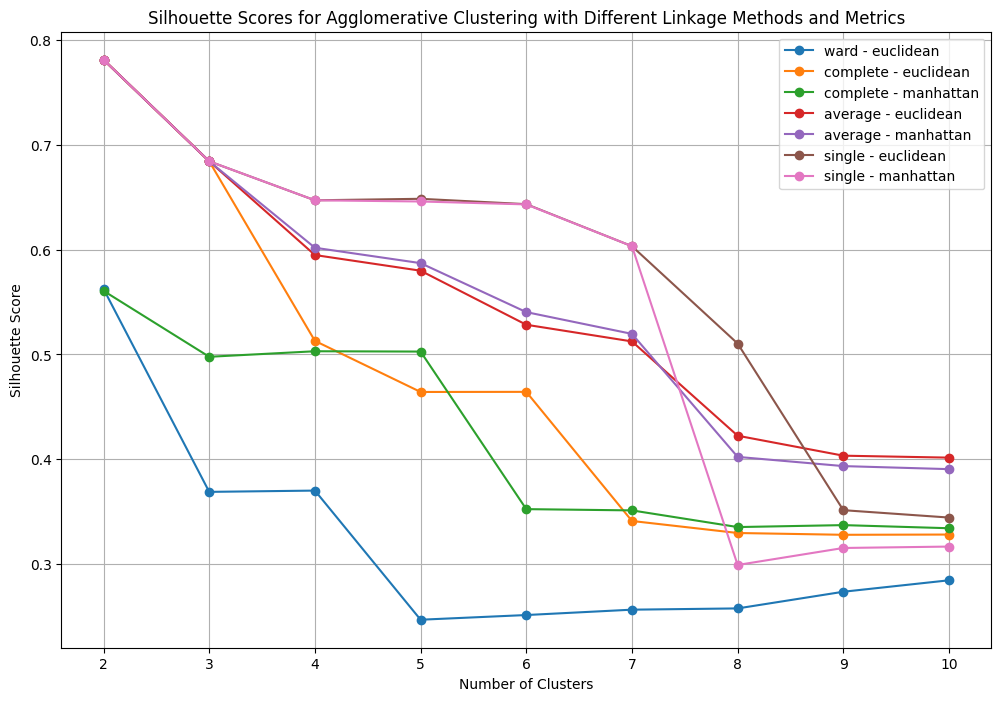

Best Silhouette Score: 0.7812569744904511
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [ ]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Silhouette Score

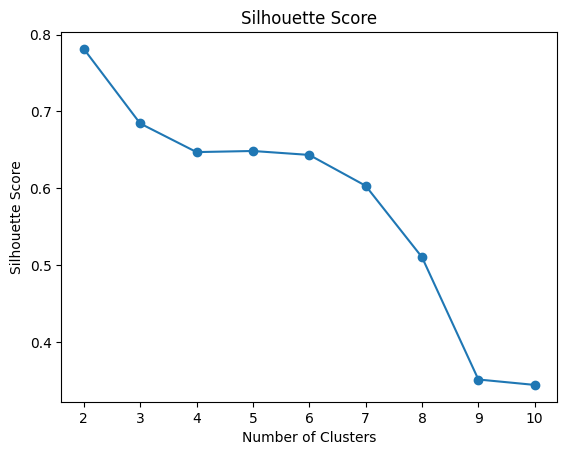

In [ ]:
# this is way to show only 1 sillhouette score
from sklearn.metrics import silhouette_score

silhouette_scores = []

for i in range(2, 11):
    # Create a new AgglomerativeClustering instance for each number of clusters
    agglo_model = AgglomerativeClustering(n_clusters=i, linkage='single')
    cluster_labels = agglo_model.fit_predict(df_scaled)
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot Silhouette Score = the higher the better
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score")
plt.show()

Grafik Silhouette Score menunjukkan hubungan antara jumlah klaster dan kualitas pemisahan data dalam proses clustering. Terlihat bahwa nilai Silhouette Score tertinggi berada pada jumlah klaster K = 2, dengan skor mendekati 0,79. Hal ini mengindikasikan bahwa ketika data dibagi menjadi dua kelompok, hasil pengelompokan paling optimal—setiap klaster memiliki kohesi internal yang tinggi dan terpisah dengan baik dari klaster lainnya. Setelah jumlah klaster meningkat dari 3 hingga 7, nilai Silhouette Score menurun perlahan, menunjukkan bahwa penambahan klaster justru mengurangi kejelasan batas antar kelompok. Penurunan yang tajam mulai terlihat pada K = 8 hingga 10, yang berarti data menjadi terlalu terfragmentasi (over-segmentation). Dengan demikian, dapat disimpulkan bahwa jumlah klaster yang paling sesuai untuk dataset ini adalah dua klaster, karena memberikan keseimbangan terbaik antara kedekatan antar anggota klaster dan pemisahan antar klaster.

Skipping Ward linkage with Manhattan metric (not supported).


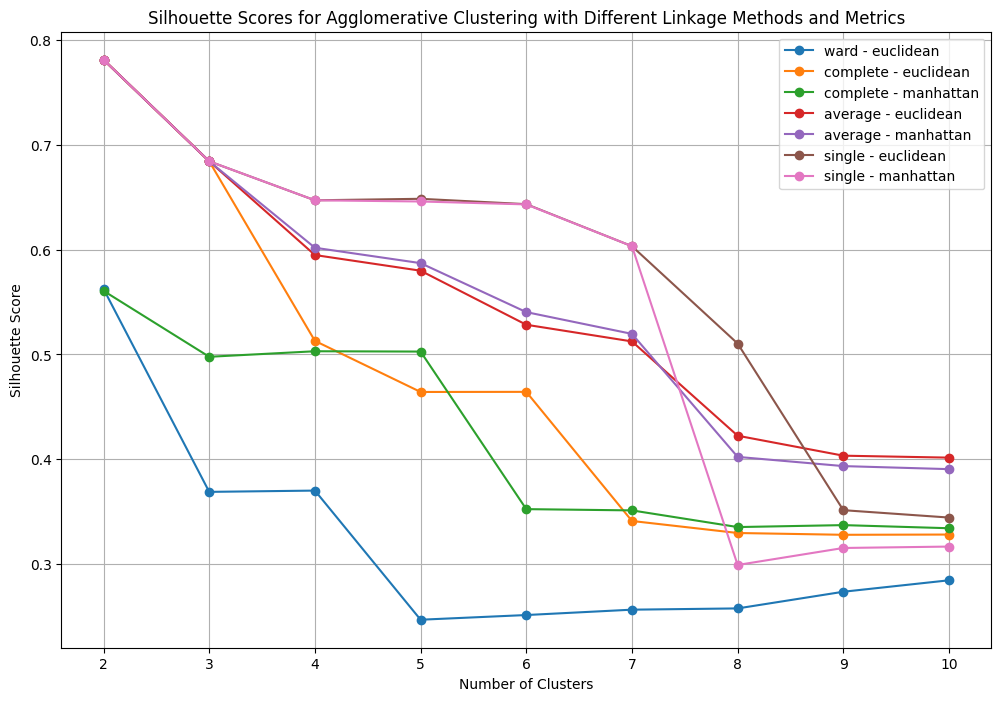

Best Silhouette Score: 0.7812569744904511
Optimal Number of Clusters: 2
Optimal Linkage Method: complete
Optimal Metric: euclidean


In [ ]:
# Define the range of clusters to test and linkage methods
range_n_clusters = range(2, 11)
linkage_methods = ['ward', 'complete', 'average', 'single']
metrics = ['euclidean', 'manhattan']

best_silhouette_score = -1
best_n_clusters = 0
best_linkage = ''
best_metric = ''

results_for_plotting = []

for linkage_method in linkage_methods:
    for metric in metrics:
        # Skip 'ward' linkage with 'manhattan' metric as it's not supported
        if linkage_method == 'ward' and metric == 'manhattan':
            print(f"Skipping Ward linkage with Manhattan metric (not supported).")
            continue

        current_scores = []
        for n_clusters in range_n_clusters:
            agglo = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method, metric=metric)
            y_agglo = agglo.fit_predict(df_scaled)
            silhouette_avg = silhouette_score(df_scaled, y_agglo)
            current_scores.append(silhouette_avg)

            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_n_clusters = n_clusters
                best_linkage = linkage_method
                best_metric = metric
        results_for_plotting.append({
            'linkage': linkage_method,
            'metric': metric,
            'scores': current_scores
        })

# Plot the silhouette scores for each linkage method and metric combination
plt.figure(figsize=(12, 8))
for result in results_for_plotting:
    plt.plot(range_n_clusters, result['scores'], marker='o', label=f"{result['linkage']} - {result['metric']}")

plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for Agglomerative Clustering with Different Linkage Methods and Metrics")
plt.legend()
plt.grid(True)
plt.show()

print(f"Best Silhouette Score: {best_silhouette_score}")
print(f"Optimal Number of Clusters: {best_n_clusters}")
print(f"Optimal Linkage Method: {best_linkage}")
print(f"Optimal Metric: {best_metric}")

## Dendogram Visualization

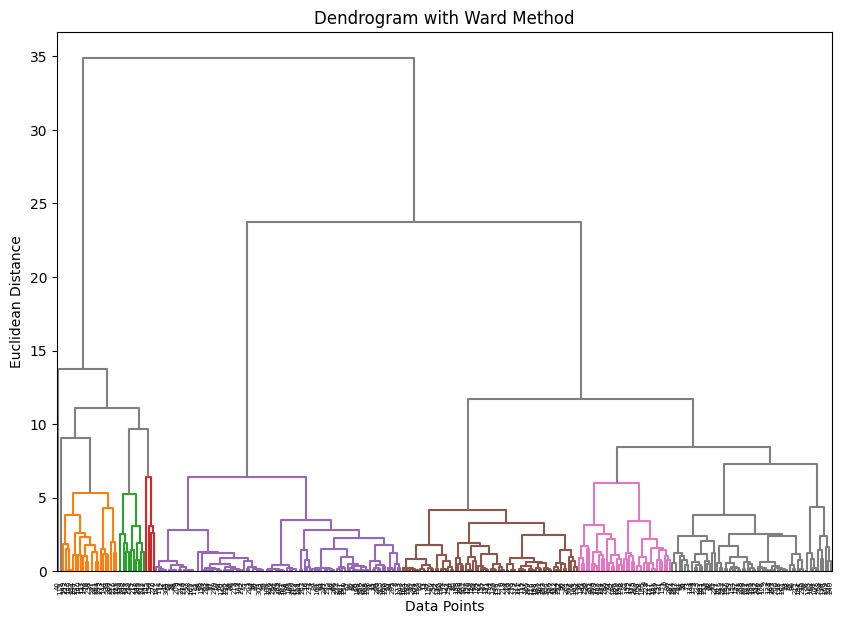

In [ ]:
# Ward Method
linked = linkage(df_scaled, method='ward', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked, above_threshold_color="grey", color_threshold=7.5)
plt.title("Dendrogram with Ward Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

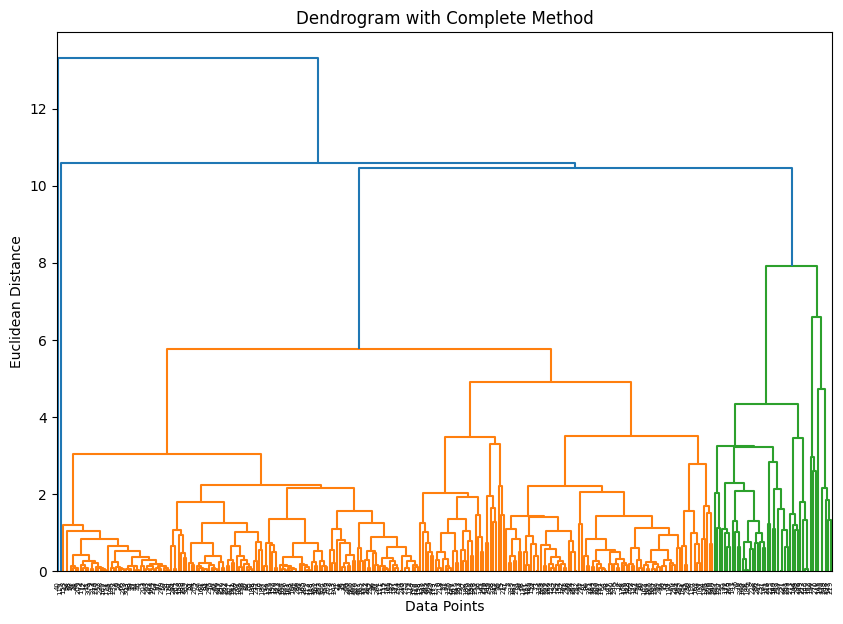

In [ ]:
# Max Distance
linked = linkage(df_scaled, method='complete', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Complete Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

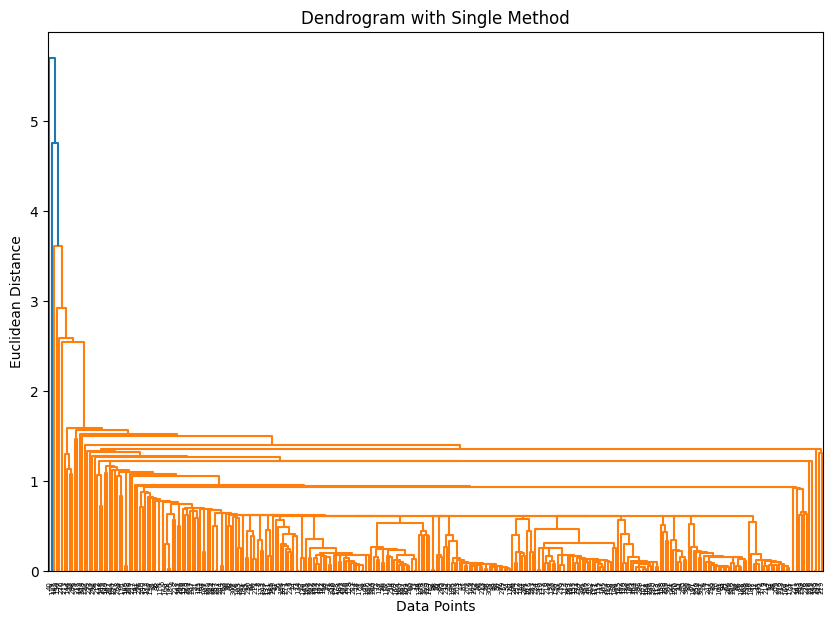

In [ ]:
# Min Distance
linked = linkage(df_scaled, method='single')

# Plot dendrogram dengan color_threshold yang sesuai
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Single Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

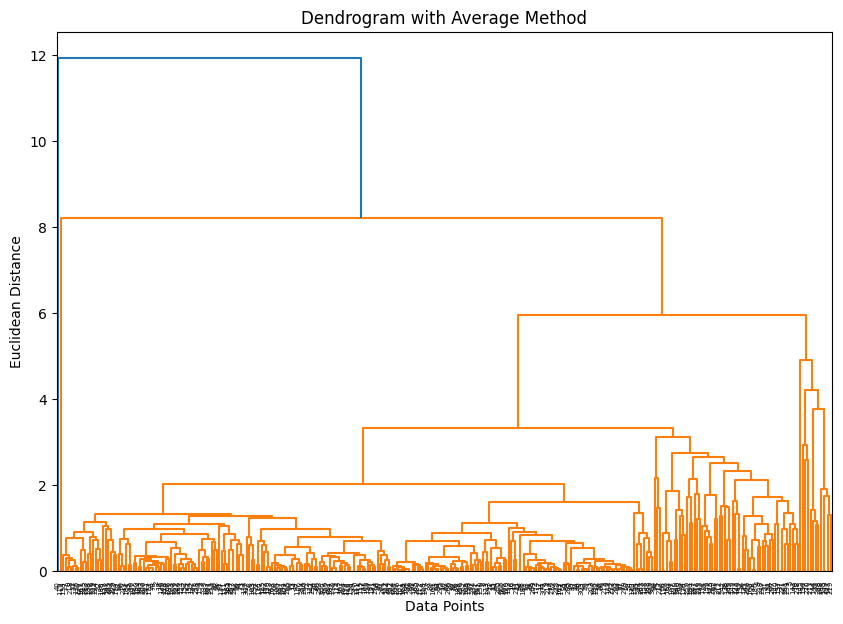

In [ ]:
# Average Distance
linked = linkage(df_scaled, method='average', metric='euclidean')

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with Average Method")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Hierarchical Clustering Model

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluate Model 1 (Optimal Parameters)
ss_best = silhouette_score(df_scaled, y_hc_best)
print(f"Silhouette Score for Model 1 (Optimal Parameters): {ss_best}")

# Evaluate Model 2 (Ward Linkage)
ss_ward = silhouette_score(df_scaled, y_hc_ward)
print(f"Silhouette Score for Model 2 (Ward Linkage): {ss_ward}")

Silhouette Score for Model 1 (Optimal Parameters): 0.7812569744904511
Silhouette Score for Model 2 (Ward Linkage): 0.5624353665605593


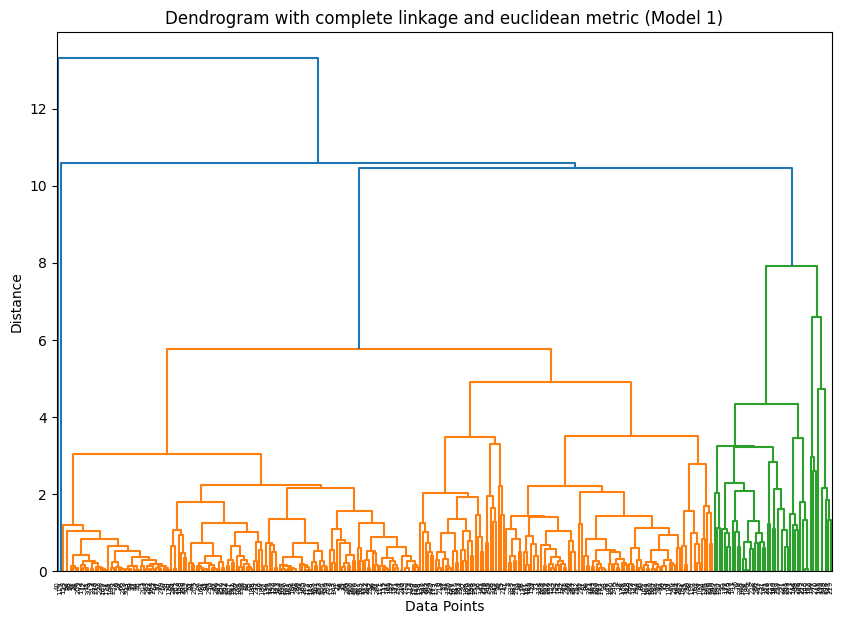

In [ ]:
# Dendrogram for Model 1 (Optimal Parameters)
linked_best = linkage(df_scaled, method=best_linkage, metric=best_metric)

plt.figure(figsize=(10, 7))
sch.dendrogram(linked_best)
plt.title(f"Dendrogram with {best_linkage} linkage and {best_metric} metric (Model 1)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

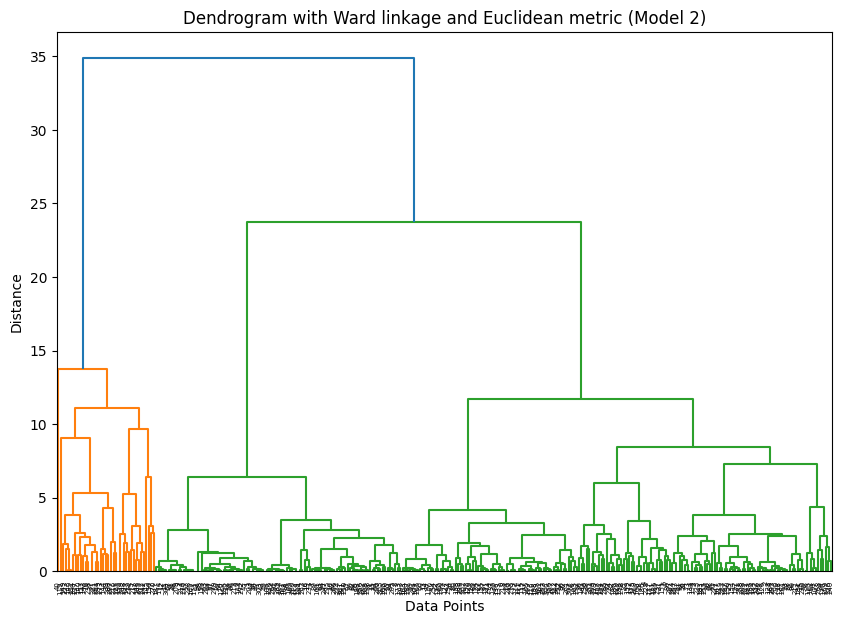

In [ ]:
# Dendrogram for Model 2 (Ward Linkage)
# Ward linkage is only supported with euclidean metric
linked_ward = linkage(df_scaled, method='ward', metric='euclidean')

plt.figure(figsize=(10, 7))
sch.dendrogram(linked_ward)
plt.title("Dendrogram with Ward linkage and Euclidean metric (Model 2)")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()

In [ ]:
# Model 1: Using the best combination of parameters from Part C
agglo_best = AgglomerativeClustering(n_clusters=best_n_clusters, linkage=best_linkage, metric=best_metric)
y_hc_best = agglo_best.fit_predict(df_scaled)

# Model 2: Using Ward linkage with the same number of clusters (n_clusters)
# Ward linkage is only supported with euclidean metric
agglo_ward = AgglomerativeClustering(n_clusters=best_n_clusters, linkage='ward', metric='euclidean')
y_hc_ward = agglo_ward.fit_predict(df_scaled)

print(f"Cluster labels for Model 1 (Optimal Parameters): {y_hc_best[:5]}")
print(f"Cluster labels for Model 2 (Ward Linkage): {y_hc_ward[:5]}")

Cluster labels for Model 1 (Optimal Parameters): [0 0 0 0 0]
Cluster labels for Model 2 (Ward Linkage): [0 0 0 0 0]


## Dendogram Visualization for Hierarchical Clustering Model

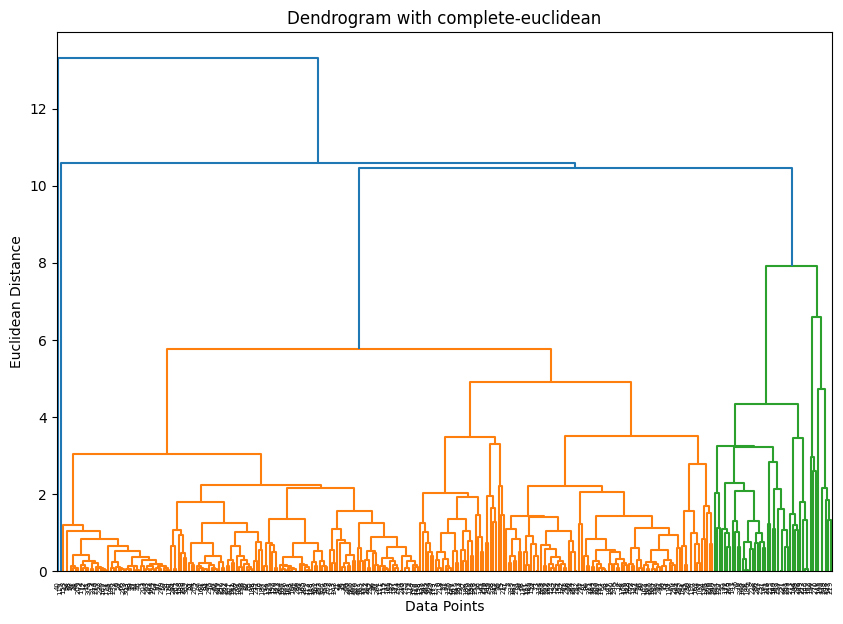

In [ ]:
# Average Distance
linked = linkage(df_scaled, method=best_linkage, metric=best_metric)

# Plot dendrogram dengan color_threshold
plt.figure(figsize=(10, 7))
sch.dendrogram(linked)
plt.title("Dendrogram with " + best_linkage + "-" + best_metric)
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

## Merge with the original data

In [ ]:
# Add the cluster labels to the original data
df['Agglo'] = y_hc_best

# Analyze the clusters with the original values
df.head()

,Area Category,Nama Daerah,Luas Tanah (m2),Luas Bangunan (m2),Jumlah Kamar,Jumlah Kamar Mandi,Tingkat/Lantai,Harga Penawaran (dari Owner),Terjual/Belum,Arah Hadap Rumah,Posisi Rumah,Lebar Jalan Depan Rumah (ROW),Agglo
0,Standard,Citraland,240,300,4,3,2,3500000000,Belum,Utara,Standard,1-2 Mobil,0
1,Below Standard,Setro Baru Utara,30,60,2,1,2,287799000,Belum,Utara,Standard,< 1 Mobil,0
2,Standard,Kenjeran,170,170,5,4,2,2699999999,Belum,Selatan,Cul De Sac/Ujung Gang Buntu,1-2 Mobil,0
3,Sangat Premium,Kenjeran,187,250,5,5,2,3100000000,Belum,Utara,Standard,1-2 Mobil,0
4,Premium,Kenjeran,350,600,5,5,2,5000000000,Belum,Barat,Standard,1-2 Mobil,0


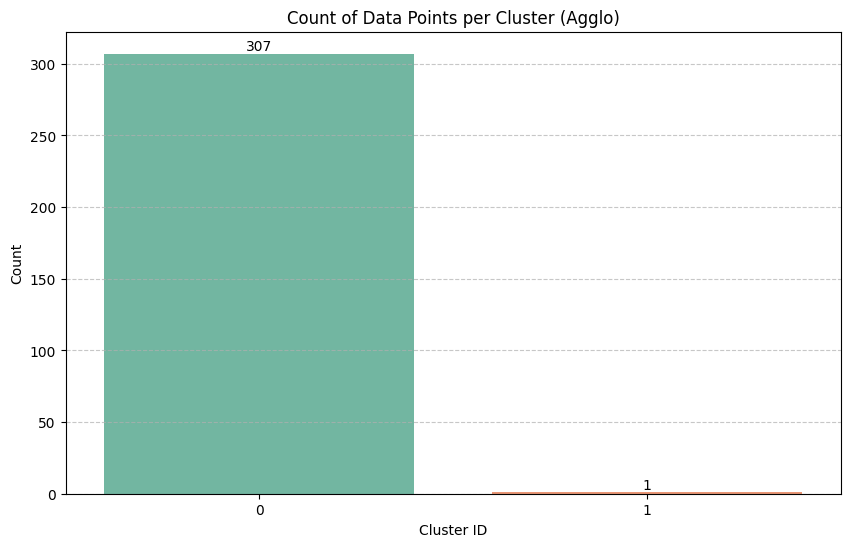

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the counts of each cluster in the 'Agglo' column of df
cluster_counts = df['Agglo'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='Set2', legend=False)

# Add labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Count of Data Points per Cluster (Agglo)')
plt.xlabel('Cluster ID')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

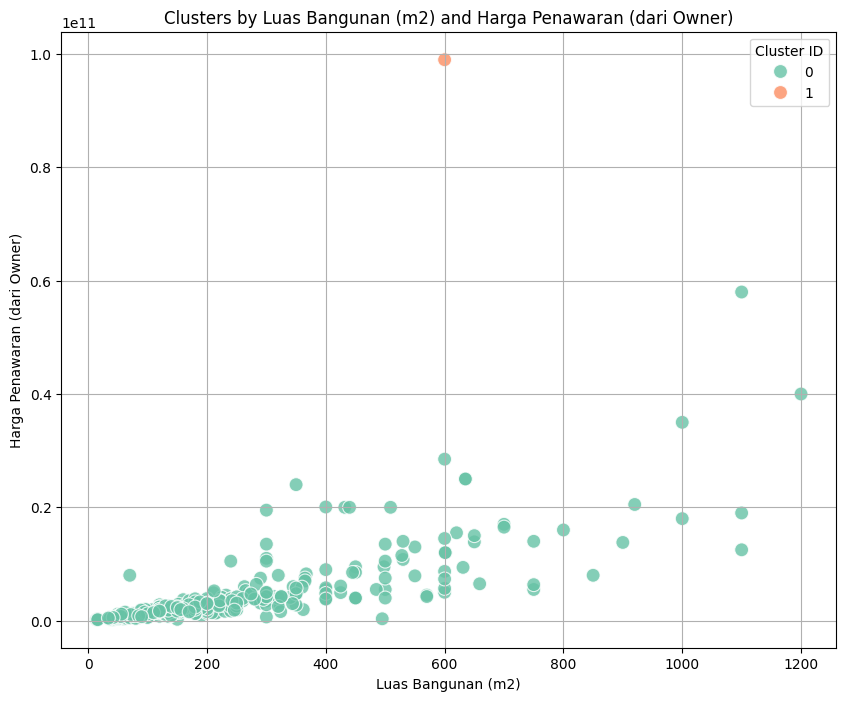

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Luas Bangunan (m2)', y='Harga Penawaran (dari Owner)', hue='Agglo', palette='Set2', s=100, alpha=0.8)
plt.title('Clusters by Luas Bangunan (m2) and Harga Penawaran (dari Owner)')
plt.xlabel('Luas Bangunan (m2)')
plt.ylabel('Harga Penawaran (dari Owner)')
plt.legend(title='Cluster ID')
plt.grid(True)
plt.show()

In [ ]:
import plotly.express as px

# Define the columns for the 3D scatter plot
x_col = 'Luas Tanah (m2)'
y_col = 'Luas Bangunan (m2)'
z_col = 'Harga Penawaran (dari Owner)'

# Create an interactive 3D scatter plot using Plotly Express
fig = px.scatter_3d(df,
                    x=x_col,
                    y=y_col,
                    z=z_col,
                    color=df['Agglo'].astype(str), # Color points by Agglo cluster, explicitly as string for discrete colors
                    title='Interactive 3D Scatter Plot of Properties by Agglo Clusters')

fig.show()

# Comparison & Interpretation

In [ ]:
# Compare results between both models

# 1. Distribution of data points per cluster
print("Cluster distribution for Model 1 (Optimal Parameters):")
cluster_counts_best = pd.Series(y_hc_best).value_counts().sort_index()
print(cluster_counts_best)

print("\nCluster distribution for Model 2 (Ward Linkage):")
cluster_counts_ward = pd.Series(y_hc_ward).value_counts().sort_index()
print(cluster_counts_ward)

# 2. Cluster mean/median/mode values for features
# Add cluster labels to the original dataframe temporarily for analysis
df_with_clusters_best = df.copy()
df_with_clusters_best['Cluster'] = y_hc_best

df_with_clusters_ward = df.copy()
df_with_clusters_ward['Cluster'] = y_hc_ward

# Select numerical columns for summary, excluding 'Tingkat/Lantai'
numerical_cols_for_summary = ['Luas Tanah (m2)', 'Luas Bangunan (m2)', 'Jumlah Kamar', 'Jumlah Kamar Mandi', 'Harga Penawaran (dari Owner)']


print("\nCluster summary for Model 1 (Optimal Parameters):")
cluster_summary_best = df_with_clusters_best.groupby('Cluster')[numerical_cols_for_summary].agg(['mean', 'median', lambda x: x.mode()[0] if not x.mode().empty else 'N/A'])
cluster_summary_best.columns = ['_'.join(col).strip() for col in cluster_summary_best.columns.values]
cluster_summary_best = cluster_summary_best.rename(columns={'<lambda>': 'mode'})
display(cluster_summary_best)


print("\nCluster summary for Model 2 (Ward Linkage):")
cluster_summary_ward = df_with_clusters_ward.groupby('Cluster')[numerical_cols_for_summary].agg(['mean', 'median', lambda x: x.mode()[0] if not x.mode().empty else 'N/A'])
cluster_summary_ward.columns = ['_'.join(col).strip() for col in cluster_summary_ward.columns.values]
cluster_summary_ward = cluster_summary_ward.rename(columns={'<lambda>': 'mode'})
display(cluster_summary_ward)

# Remove the temporary cluster columns
df_with_clusters_best = df_with_clusters_best.drop('Cluster', axis=1)
df_with_clusters_ward = df_with_clusters_ward.drop('Cluster', axis=1)

Cluster distribution for Model 1 (Optimal Parameters):
0    307
1      1
Name: count, dtype: int64

Cluster distribution for Model 2 (Ward Linkage):
0    269
1     39
Name: count, dtype: int64

Cluster summary for Model 1 (Optimal Parameters):


,Luas Tanah (m2)_mean,Luas Tanah (m2)_median,Luas Tanah (m2)_<lambda_0>,Luas Bangunan (m2)_mean,Luas Bangunan (m2)_median,Luas Bangunan (m2)_<lambda_0>,Jumlah Kamar_mean,Jumlah Kamar_median,Jumlah Kamar_<lambda_0>,Jumlah Kamar Mandi_mean,Jumlah Kamar Mandi_median,Jumlah Kamar Mandi_<lambda_0>,Harga Penawaran (dari Owner)_mean,Harga Penawaran (dari Owner)_median,Harga Penawaran (dari Owner)_<lambda_0>
Cluster,,,,,,,,,,,,,,,
0,225.736156,162.0,240,265.602606,200.0,300,4.267101,4.0,4,3.332248,3.0,3,4.708159e+09,2.699000e+09,3500000000
1,600.000000,600.0,600,600.000000,600.0,600,7.000000,7.0,7,5.000000,5.0,5,9.900000e+10,9.900000e+10,99000000000



Cluster summary for Model 2 (Ward Linkage):


,Luas Tanah (m2)_mean,Luas Tanah (m2)_median,Luas Tanah (m2)_<lambda_0>,Luas Bangunan (m2)_mean,Luas Bangunan (m2)_median,Luas Bangunan (m2)_<lambda_0>,Jumlah Kamar_mean,Jumlah Kamar_median,Jumlah Kamar_<lambda_0>,Jumlah Kamar Mandi_mean,Jumlah Kamar Mandi_median,Jumlah Kamar Mandi_<lambda_0>,Harga Penawaran (dari Owner)_mean,Harga Penawaran (dari Owner)_median,Harga Penawaran (dari Owner)_<lambda_0>
Cluster,,,,,,,,,,,,,,,
0,168.713755,144.0,240,207.278810,180.0,300,3.981413,4.0,4,3.066914,3.0,3,2.895761e+09,2.300000e+09,3500000000
1,628.641026,600.0,450,676.461538,631.0,600,6.307692,6.0,5,5.205128,5.0,5,1.962679e+10,1.550000e+10,12000000000


Which method gives more meaningful segmentation ?

**Model 1 (Optimal Parameters: Complete linkage, Euclidean metric, 2 clusters)** resulted in a highly uneven cluster distribution, with one cluster containing almost all data points (307) and the other containing only a single data point (1). This indicates that this model did not effectively group similar data points together and likely identified an outlier as a separate cluster.

**Model 2 (Ward Linkage, Euclidean metric, 2 clusters)** resulted in a more balanced cluster distribution, with one cluster containing 269 data points and the other containing 39 data points. The cluster summaries for Model 2 show more distinct differences in the mean and median values for features like 'Luas Tanah (m2)', 'Luas Bangunan (m2)', and 'Harga Penawaran (dari Owner)' between the two clusters compared to Model 1.

**Conclusion:**

Although Model 1 had a slightly higher silhouette score, the resulting cluster distribution is not meaningful for segmentation purposes. **Model 2 (Ward Linkage, Euclidean metric)** provides a more balanced and interpretable segmentation of the data into two distinct groups based on the numerical features. Therefore, Model 2 is considered to give a more meaningful segmentation in this case.

## Managerial Interpretation and Business Implications

Based on the clustering results, particularly from Model 2 (Ward linkage, Euclidean metric), we can identify two distinct property market segments:

**Cluster 0 (Larger Cluster):** This cluster represents the majority of properties in the dataset. Based on the cluster summary, these properties generally have smaller land and building areas, fewer rooms and bathrooms, and significantly lower average and median prices compared to Cluster 1.

*   **Managerial Interpretation:** This cluster likely represents the standard or more affordable segment of the property market. These properties are more common and cater to a broader range of buyers.
*   **Business Implications:**
    *   **Pricing Strategies:** Pricing for these properties should be competitive and aligned with market averages for similar-sized properties in their respective areas. Volume-based sales strategies might be effective in this segment.
    *   **Area Targeting:** Marketing efforts can be focused on areas with a higher concentration of these types of properties, targeting middle-income buyers or those looking for more budget-friendly options.
    *   **Marketing:** Highlight features like affordability, practicality, and accessibility.

**Cluster 1 (Smaller Cluster):** This cluster contains a smaller number of properties, but they are characterized by significantly larger land and building areas, more rooms and bathrooms, and substantially higher average and median prices.

*   **Managerial Interpretation:** This cluster represents the premium or luxury segment of the property market. These properties are less common and cater to a more affluent clientele.
*   **Business Implications:**
    *   **Pricing Strategies:** Premium pricing is justified by the larger size, potentially better location, and higher number of amenities (rooms, bathrooms). Value-based pricing, emphasizing exclusivity and luxury, can be employed.
    *   **Area Targeting:** Marketing efforts should focus on upscale neighborhoods or areas known for premium properties. Targeting high-net-worth individuals and investors would be appropriate.
    *   **Marketing:** Emphasize luxury features, spaciousness, prime locations, and potential for appreciation. Personalized marketing and exclusive showings might be effective.

**Overall:**

The clustering analysis reveals a clear segmentation within the property market based on size and price. This information is valuable for:

*   **Targeted Marketing:** Tailoring marketing campaigns and messaging to the specific characteristics and preferences of each cluster.
*   **Pricing Optimization:** Setting competitive and profitable prices based on the segment a property belongs to.
*   **Inventory Management:** Understanding the distribution of properties across segments can help in managing inventory and identifying potential gaps in the market.
*   **Development Strategies:** Developers can use this information to identify opportunities for building properties that cater to specific segments.

By understanding these distinct segments, businesses in the property market can make more informed decisions regarding sales, marketing, pricing, and development strategies.